# Стохастический градиентный и координатный спуски

Александр Журавлев DST-120
***

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-ddhp{background-color:#2E765E;color:#FFF;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-5ajl{background-color:#404040;color:#FFF;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-gifo{background-color:#F5F5F5;color:#222;font-style:italic;text-align:left;vertical-align:top}
.tg .tg-7wf9{background-color:#F5F5F5;color:#222;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-ddhp">ЗАДАНИЕ</th>
    <th class="tg-ddhp">БАЛЛЫ</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-5ajl" colspan="2">1. Загрузка и подготовка данных</td>
  </tr>
  <tr>
    <td class="tg-gifo"><span style="font-style:italic">Аккуратное и полное выполнение задания</span></td>
    <td class="tg-7wf9">1</td>
  </tr>
  <tr>
    <td class="tg-5ajl" colspan="2">2. Координатный спуск</td>
  </tr>
  <tr>
    <td class="tg-7wf9">Реализация алгоритма координатного спуска</td>
    <td class="tg-7wf9">3</td>
  </tr>
  <tr>
    <td class="tg-gifo"><span style="font-style:italic">Аккуратное и полное выполнение задания</span></td>
    <td class="tg-7wf9">1</td>
  </tr>
  <tr>
    <td class="tg-5ajl" colspan="2">3. Стохастический градиентный спуск</td>
  </tr>
  <tr>
    <td class="tg-7wf9">Масштабирование столбцов исходной матрицы</td>
    <td class="tg-7wf9">1</td>
  </tr>
  <tr>
    <td class="tg-7wf9">Создание функции для вычисления среднеквадратичной ошибки</td>
    <td class="tg-7wf9">1</td>
  </tr>
  <tr>
    <td class="tg-7wf9">Составление наивного прогноза (предсказание продаж средним значением)</td>
    <td class="tg-7wf9">1</td>
  </tr>
  <tr>
    <td class="tg-7wf9">Создание функции для получения вектора прогнозов</td>
    <td class="tg-7wf9">1</td>
  </tr>
  <tr>
    <td class="tg-7wf9">Создание функции для реализации шага стохастического градиентного спуска</td>
    <td class="tg-7wf9">2</td>
  </tr>
  <tr>
    <td class="tg-7wf9">Создание функции для реализации стохастического градиентного спуска</td>
    <td class="tg-7wf9">3</td>
  </tr>
  <tr>
    <td class="tg-gifo"><span style="font-style:italic">Аккуратное и полное выполнение задания</span></td>
    <td class="tg-7wf9">1</td>
  </tr>
</tbody>
</table>

Максимальное количество баллов — 15.

***

## Загрузка и подготовка данных

In [1]:
# загрузим необходимые библиотеки

# для работы с данными и вычислений
import numpy as np
import pandas as pd

# для работы с моделями и метриками
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn import metrics

# для визуализации
import seaborn as sns

# не отображаем предупреждения
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [2]:
# загружаем указанный файл с данными
df = pd.read_csv('data/Advertising.csv')

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
# проверяем на наличие пропусков
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Выводы:**
- пропусков нет
- имеется признак *Unnamed 0*, который дублирует индексы, но начинается с 1

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [4]:
# разделяем данные на предикторы и таргет, преобразуя их в массивы
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

***

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [5]:
# добавляем в матрицу наблюдений единичный столбец
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
# преобразуем вектор y в массив
y = y.reshape(-1, 1)

# проверим размерность данных
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [6]:
# нормализуем предикторы
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [7]:
# задаем функцию для решения задания
def grad_d(X,y, w, num_iters = 1000):
    '''
    Функция реализует алгоритм координатного спуска.
    Параметры функции:
        X: матрица наблюдений (предикторы)
        y: целевая переменная (таргет)
        w: вектор коэффициентов 
        num_iters: кол-во итераций, по умолчанию = 1000
    Функция возвращает:
        w: вектор с параметрами(коэффициентами)
        cost_mse: значение функции потерь MSE (она же метрика MSE)
        mae: значение метрики MAE
    '''
    cost_mse = []
    mae = []
    for i in range(num_iters):
        for k in range(m):
            # Вычисляем прогноз без k-ого фактора
            h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
            # Обновляем новое значение k-ого коэффициента
            w[k] =  (X[:,k].T @ (y - h))
            # Вычисляем функцию потерь MSE (она же метрика MSE)
            cost_mse = sum((y - (X @ w)) ** 2)/(len(y))
            # Вычисляем метрику MAE
            mae = sum(abs(y - (X @ w)))/(len(y))
        
    return w, cost_mse, mae

# задаем количество признаков (включая столбец с единицами)
m = X.shape[1]
# указываем количество строк(наблюдений)
n = len(y)
# задаем пустой вектор параметров
w = np.zeros((4,1))

# реализуем алгоритм координатного спуска
w, cost_mse, mae = grad_d(X,y, w)

# выводим требуемые данные
print(f'Коэффициенты линейной регрессии: \n {w}')
print(f'Функция потерь(метрика) MSE: {cost_mse}')
print(f'Метрика MAE: {mae}')

Коэффициенты линейной регрессии: 
 [[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]
Функция потерь(метрика) MSE: [2.78412631]
Метрика MAE: [1.25201123]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [8]:

# создаем и обучаем модель линейной регрессии
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
# делаем предсказание
y_predict = model.predict(X)

# вычисляем метрики MSE и MAE
model_mse = metrics.mean_squared_error(y,y_predict)
model_mae = metrics.mean_absolute_error(y,y_predict)

# выводим требуемые данные
print(f'Коэффициенты модели: \n {model.coef_}')
print(f'Метрика MSE модели: {model_mse}')
print(f'Метрика MAE модели: {model_mae}')

Коэффициенты модели: 
 [[ 41.56217205 110.13144155  73.52860638  -0.55006384]]
Метрика MSE модели: 2.784126314510936
Метрика MAE модели: 1.2520112296870658


Если вы все сделали верно, они должны практически совпасть!

**Выводы:**
- коэффициенты и метрики в обоих случаях совпадают
- что говорит о том, что ручной алгоритм координатного спуска реализован нами верно
- в представленном алгоритме(псевдокоде) указано, что **m** - это количество строк, а **n** - количество столбцов в матрице X, что вводит в заблуждение, т.к. выше указано, что задана $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$. Полагаю необходимым это исправить.

***

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [9]:
# заново разделяем данные на предикторы и таргет, преобразуя их в массивы
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

# проводим стандартизацию матрицы наблюдений
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

**Добавим единичный столбец**

In [10]:
# добавляем в матрицу наблюдений единичный столбец
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
# преобразуем вектор y в массив
y = y.reshape(-1, 1)

# задаем нулевой вектор коэффициентов (весов модели)
w = np.zeros([4, 1])

# проверим размерность данных
print(X.shape, y.shape)

(200, 4) (200, 1)


**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [11]:
def mse_error(y, y_predict):
    '''
    Функция вычисляет среднеквадратичную ошибку MSE.
    Параметры функции:
        y: массив/вектор с реальными значениями целевой переменной
        y_predict: массив/вектор с предсказанными значениями целевой переменной
    Функция возвращает: 
        значение среднеквадратичной ошибки MSE
    '''
    mse_error = sum((y - y_predict) ** 2)/(len(y))
    return mse_error

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [12]:
# предсказываем продажи средним значением таргета
y_predict = np.mean(y, axis=0)

# рассчитываем и выводим MSE
print(mse_error(y, y_predict))

[27.08574375]


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [13]:
def lin_pred(X, w):
    '''
    Функция вычисляет одномерный массив прогнозов
    Параметры функции:
        X: матрица предикторов(наблюдений)
        w: вектор весов(коэффициентов) линейной модели
    Функция возвращает: 
        одномерный массив прогнозов
    '''
    # получаем вектор прогнозов линейной модели
    y_predict = X@w
    # преобразуем полученный вектор в одномерный массив
    y_predict = y_predict.reshape(-1, 1)

    return y_predict

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [14]:
def stoch_grad_step(X, y, w, train_index, eta):
    '''
    Функция реализует шаг стохастического градиентного спуска
    Параметры функции:
        X: матрица предикторов(наблюдений)
        y: одномерный массив реальных значений целевой переменной
        w: вектор весов(коэффициентов) линейной модели
        train_index: индекс объекта обучающей выборки (строки матрицы X), по которому считается изменение весов
        eta: шаг градиентного спуска
    Функция возвращает: 
        обновленные веса(коэффициенты) линейной модели
    '''
    # определяем объект (строку матрицы X) по полученному индексу                 
    object = X[train_index] 
    # предсказываем целевую переменную по данным объекта                
    y_predict = lin_pred(X[train_index], w) 
    # рассчитываем направление изменения весов модели по формуле
    direction = (object*2*(y_predict - y[train_index])) / 1 
    # обновляем веса(коэффициенты) модели
    w_new = w - direction*eta

    return w_new[0]

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [15]:
def stochastic_gradient_descent(X, y, w, eta, max_iter,
                                min_weight_dist, seed):
    '''
    Функция реализует стохастический градиентный спуск
    Параметры функции:
        X: матрица предикторов(наблюдений)
        y: одномерный массив реальных значений целевой переменной
        w: вектор весов(коэффициентов) линейной модели
        eta: параметр, определяющий темп обучения 
        max_iter: максимальное число итераций
        min_weight_dist: минимальное евклидово расстояние между векторами весов на соседних итерациях
                         градиентного спуска, при котором алгоритм прекращает работу
        seed: для воспроизводимости эксперимета
    Функция возвращает: 
        w: обновленные веса(коэффициенты) линейной модели
        errors: значения MSE
    '''
    # инициализируем евклидово расстояние между векторами весов 
    weight_dist = float("inf") # задаем бесконечность
    # фиксируем ошибки MSE
    errors = []
    # счетчик итераций
    iter_num = 0
    
    np.random.seed(seed) # фиксируем seed для воспроизводимости
        
    # основной цикл:
    # пока расстояние между векторами весов больше того, при котором надо прекратить работу
    # и количество итераций меньше максимально разрешенного:
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # задаем случайный индекс строки матрицы X
        random_index = np.random.randint(X.shape[0])
        # обновляем веса
        new_w = stoch_grad_step(X, y, w, random_index, eta)
        # считаем ошибку и добавляем ее в список
        error = mse_error(y[random_index], lin_pred(X[random_index], new_w))
        errors.append(error)
        # считаем расстояние между векторами весов 
        weight_dist = np.linalg.norm(w-new_w)
        # обновляем веса и считаем итерацию
        w = new_w
        iter_num += 1
        
    return w, errors


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [16]:
# реализуем стохастический градиентный спуск
w,errors = stochastic_gradient_descent(X, y, w, eta=0.0001, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42)


**Постройте график зависимости ошибки от номера итерации**

Количество итераций: 53433


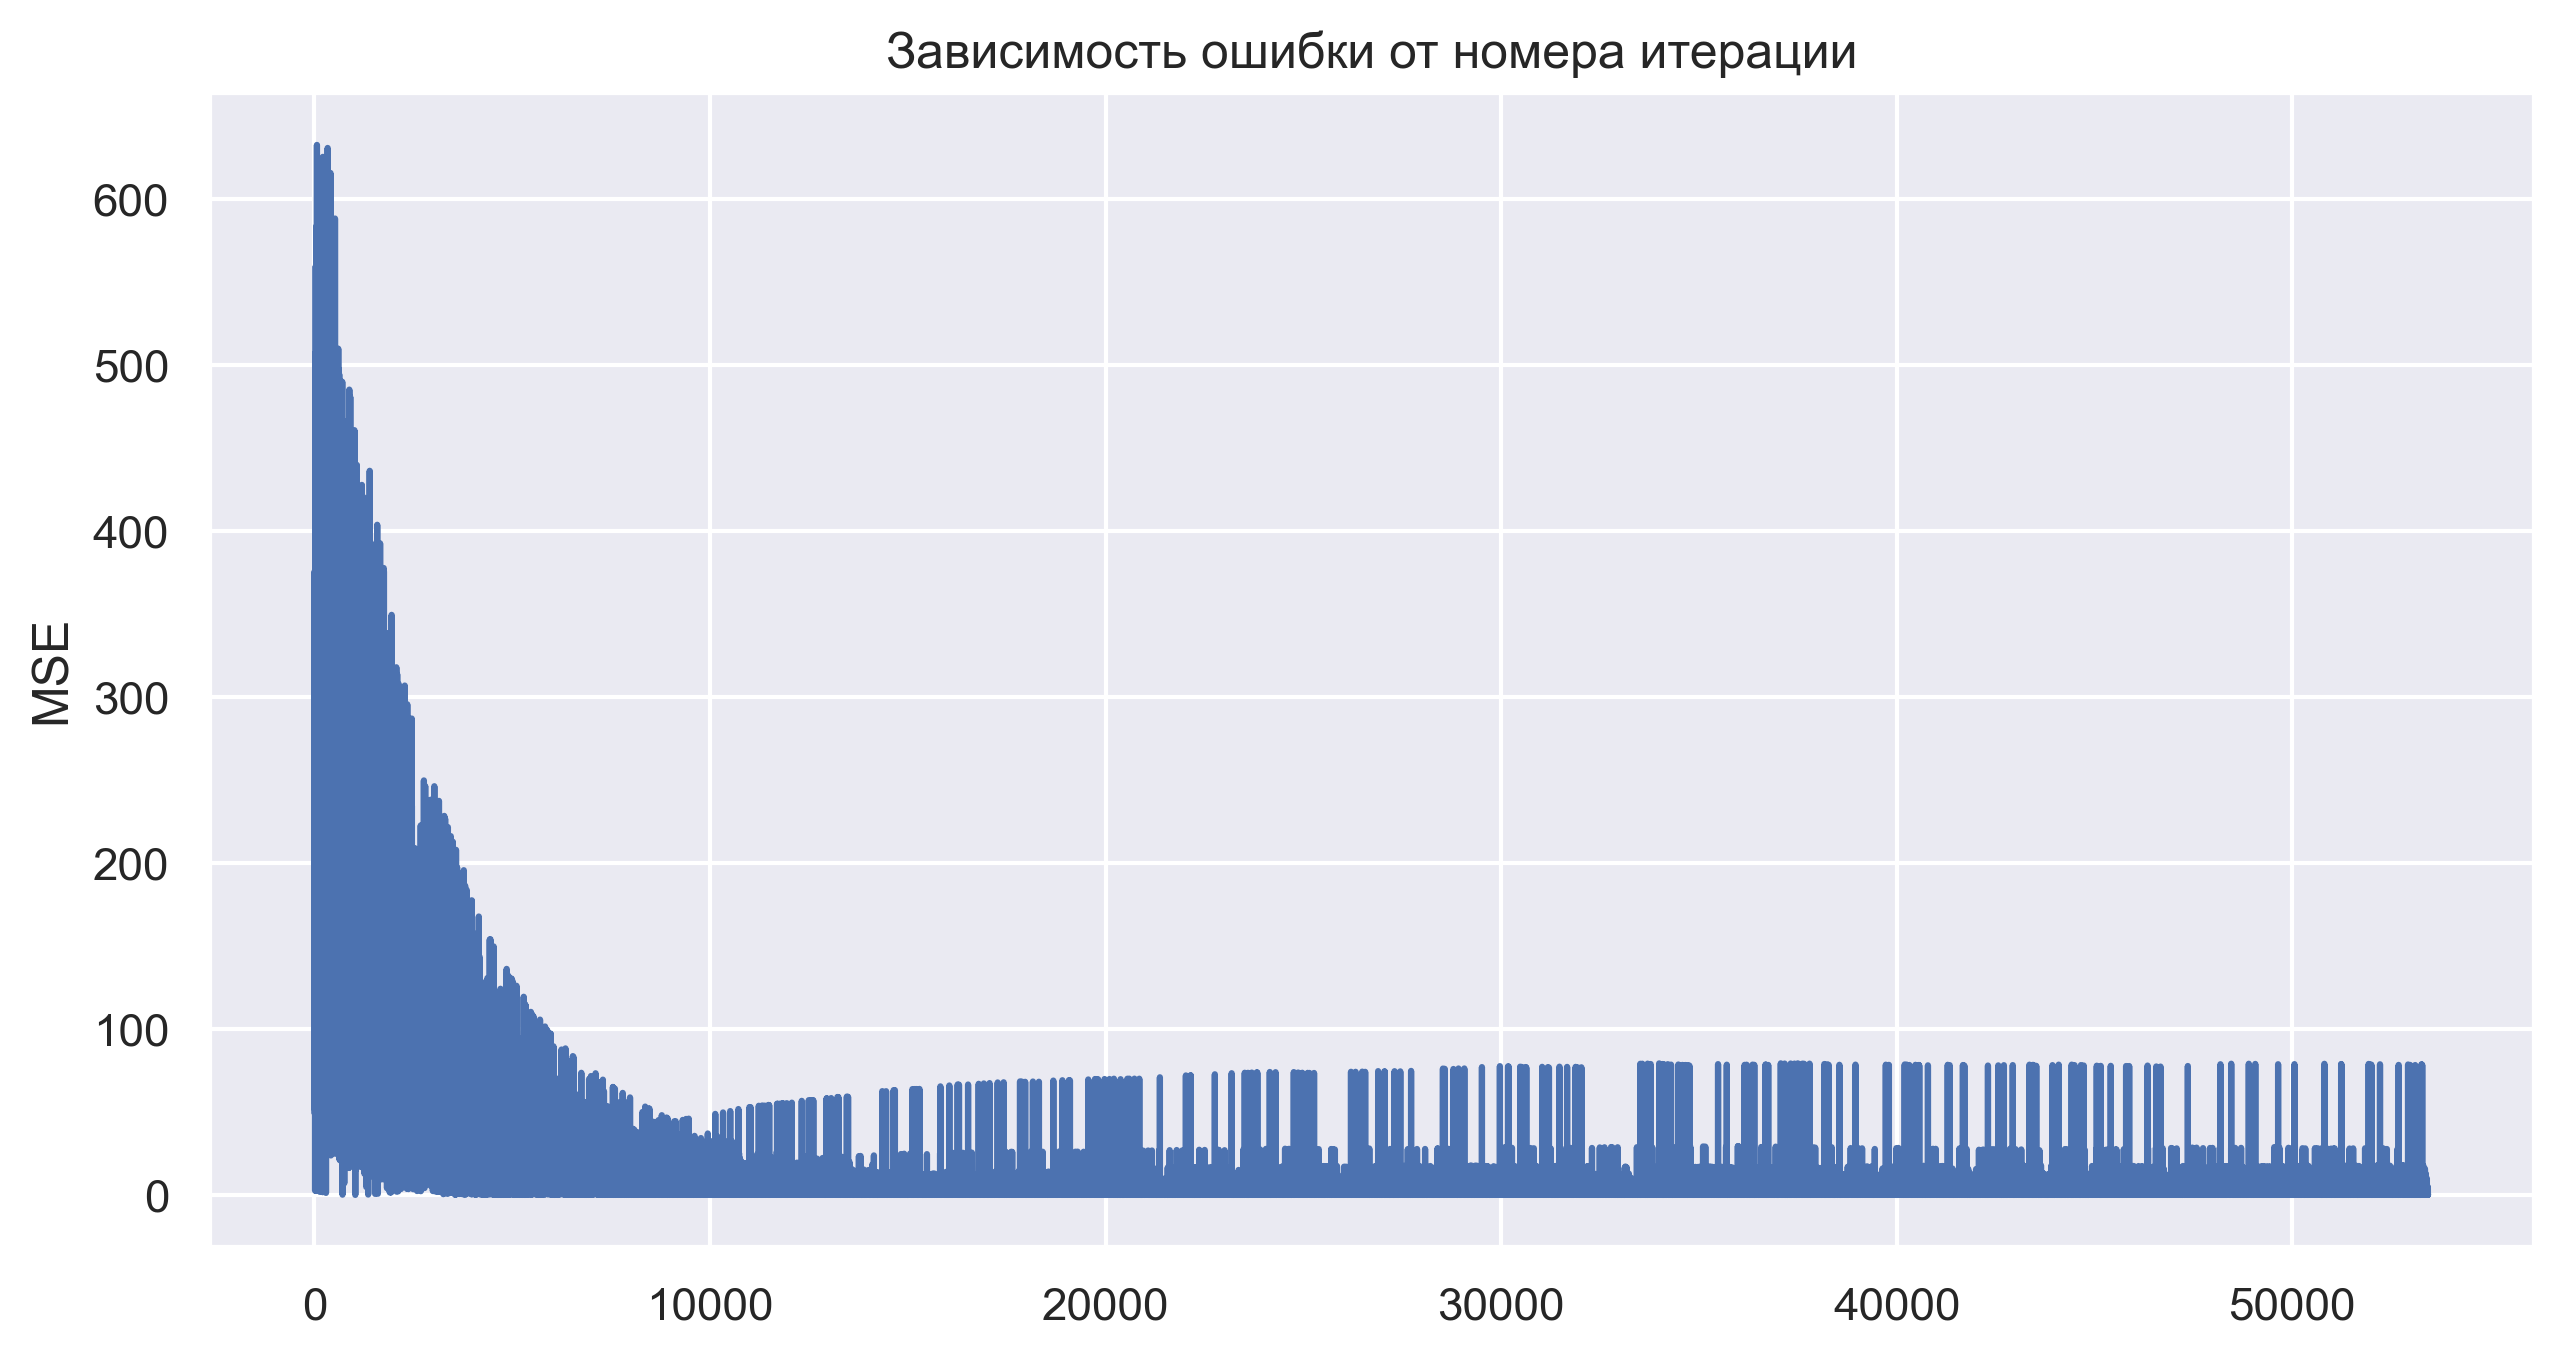

In [17]:
# преобразуем список массивов с ошибками в обычный список
new_errrors = [] # новый список с ошибками
for i in range(len(errors)):
    new_errrors.append(errors[i][0])

# создаем датафрейм из нового списка с ошибками
errors_df = pd.DataFrame({'MSE': new_errrors})

# визуализируем зависисмоть ошибки от номера итерации
sns.set(rc={'figure.figsize':(10,5), 'figure.dpi':300})
sns.lineplot(data=errors_df, x=errors_df.index, y='MSE').\
    set_title('Зависимость ошибки от номера итерации');

print(f'Количество итераций: {len(new_errrors)}')

**Выведите вектор весов, к которому сошелся метод.**

In [18]:
print(f'Вектор весов:\n {w}')

Вектор весов:
 [14.01943426  3.92231475  2.82193654 -0.0326486 ]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [19]:
print(f'Среднеквадратичная ошибка на последней итерации:\n {errors[-1][0]}')  

Среднеквадратичная ошибка на последней итерации:
 1.0730595740456014e-11


In [20]:
# доплнительно выведем метрики MSE и MAE для всех данных
print(f'Метрика MSE: {mse_error(y,lin_pred(X,w))}')
print(f'Метрика MAE: {sum(abs(y - lin_pred(X,w)))/(len(y))}')

Метрика MSE: [2.78493236]
Метрика MAE: [1.25089949]


**Выводы:**
- был реализован алгоритм стохастического градиентного спуска
- получены следующие результаты:
    - вектор весов: [14.01943426  3.92231475  2.82193654 -0.0326486 ]
    - MSE на последней итерации 1.0730595740456014e-11
    - метрики MSE и MAE 2.78493236 и 1.25089949 соответственно
    - выполнено 53433 итерации
- судя по всему алгоритм сошелся
- итоговые метрика MSE значительно превысила метрику наивного прогноза
- к сожалению, у меня нет уверенности, что в алгоритме не были допущены ошибки, поэтому полагаю полезным выполнить повторный градиентный спуск, но уже с использованием библиотеки *sklearn* и сравнить полученные результаты

***

## Дополнительно 
Реализуем градиентный стохастический спуск, используя библиотеку *sklearn*

In [21]:
# создаем и обучаем модель
reg = SGDRegressor(max_iter=100000)
reg.fit(X,y)

# предсказываем таргет
y_predict = reg.predict(X)

# вычисляем метрики MSE и MAE
model_mse = metrics.mean_squared_error(y,y_predict)
model_mae = metrics.mean_absolute_error(y,y_predict)

# выводим полученные данные
print(f'Коэффициенты модели: \n {reg.coef_}')
print(f'Метрика MSE модели: {model_mse}')
print(f'Метрика MAE модели: {model_mae}')

Коэффициенты модели: 
 [ 7.01303463e+00  3.91928092e+00  2.77105569e+00 -2.68402363e-03]
Метрика MSE модели: 2.7847318327990713
Метрика MAE модели: 1.2526695939326524


**Выводы:**
- при реализации градиентного спуска с использованием библиотеки *sklearn* были получены следующие результаты:
    - вектор весов: [ 7.01303463e+00  3.91928092e+00  2.77105569e+00 -2.68402363e-03]
    - метрики MSE и MAE 2.7847318327990713 и 1.2526695939326524 соответственно
- метрики совпадают до 2-го знака после запятой включительно, веса различаются
- вероятно, это говорит о том, что оба алгоритма (наш ручной и библиотеки *sklearn*) сошлись на одном уровне (об это говорят практически одинаковые метрики MSE), но в разных точках пространства (об этом говорят разные вектора весов). Другими словами, оба алгоритма застряли в разных минимумах, которые имеют примерно одинаковую глубину.